# **NATURAL GAS STORAGE ANALYSIS AND FORECASTING**

## **Introduction:**
The storage of natural gas plays a crucial role in maintaining energy supply stability and meeting demand fluctuations. Understanding trends and patterns in natural gas storage data is essential for energy market analysis, policy-making, and decision-making by energy companies. In this project, we will analyze weekly natural gas storage data provided by the Energy Information Administration (EIA) to gain insights into storage levels, trends, and comparisons with historical data.

## **Methodology:**

*   **STEP 1 - Data Collection** : In this step, we collect the required data for analysis. For natural gas storage analysis, we obtain weekly storage data from reliable sources such as the Energy Information Administration (EIA) website or API. The data should include relevant information such as storage levels in billion cubic feet (Bcf) for different regions, historical comparisons, and any other relevant metadata.
*   **STEP 2 - Exploratory Data Analysis** : Exploratory Data Analysis (EDA) involves examining and visualizing the collected data to understand its structure, patterns, and characteristics. EDA helps in gaining insights into the data and informing subsequent analysis steps.
*   **STEP 3 - Stationarity Check** : Stationarity is a key assumption for many time series analysis techniques. In this step, we check for stationarity in the time series data. This involves performing statistical tests such as the Augmented Dickey-Fuller (ADF) test to assess the presence of trends, seasonality, and other patterns that could affect the stability of the data over time. If the data is non-stationary, we apply transformations such as differencing to achieve stationarity.
*   **STEP 4 - Model Selection** :
*   **STEP 5 - Residual Diagnosis** :
*   **STEP 6 - Forecasting** :

In [3]:
#Mounting Drive to our notebook
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing Necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

## Data Collection:

From the website we can directly download the records for the last 5 years in CSV format.

Website: https://ir.eia.gov/ngs/ngs.html

In [4]:
csv_data = pd.read_csv('/content/drive/MyDrive/Natural Gas Storage Report - Sheet1.csv')

In [5]:
csv_data.head()

,Week ending,East Region,Midwest Region,Mountain Region,Pacific Region,South Central Region,Salt,NonSalt,Total Lower 48
0,10/04/2015,2.2%,1.7%,3.2%,4.1%,1.8%,3.3%,2.1%,1.2%
1,17/04/2015,2.1%,1.7%,3.1%,4.0%,1.7%,3.0%,2.1%,1.1%
2,24/04/2015,2.1%,1.7%,3.1%,3.6%,1.7%,2.9%,2.0%,1.1%
3,01/05/2015,2.1%,1.6%,2.9%,3.6%,1.6%,2.7%,2.0%,1.0%
4,08/05/2015,1.9%,1.6%,2.8%,3.4%,1.6%,2.8%,2.0%,1.0%


## Exploratory Data Analysis EDA:

We will be ploting the time series graphs for all the regions as a part of our analysis and will create a pipeling for each region seperately where user can select any region of his choice for further analysis.

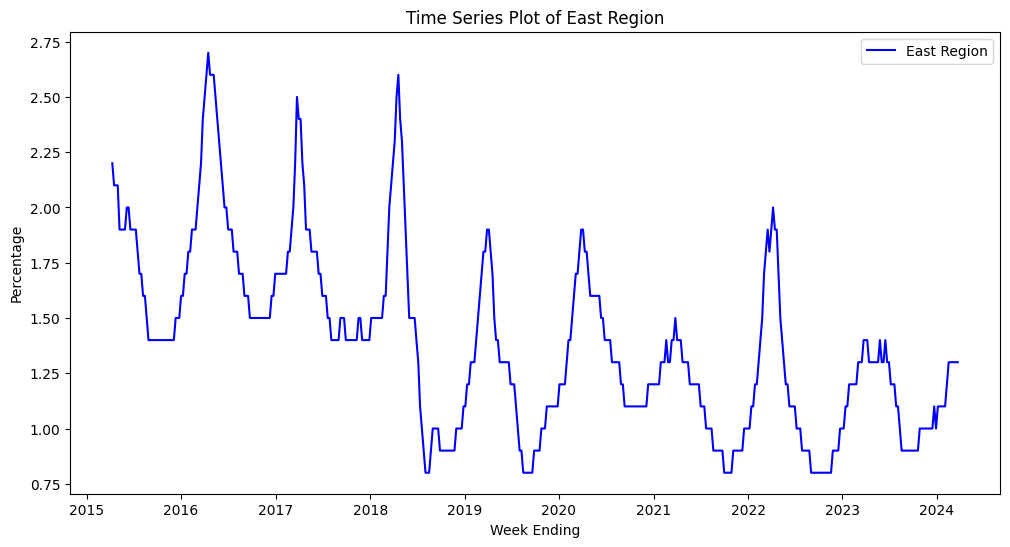

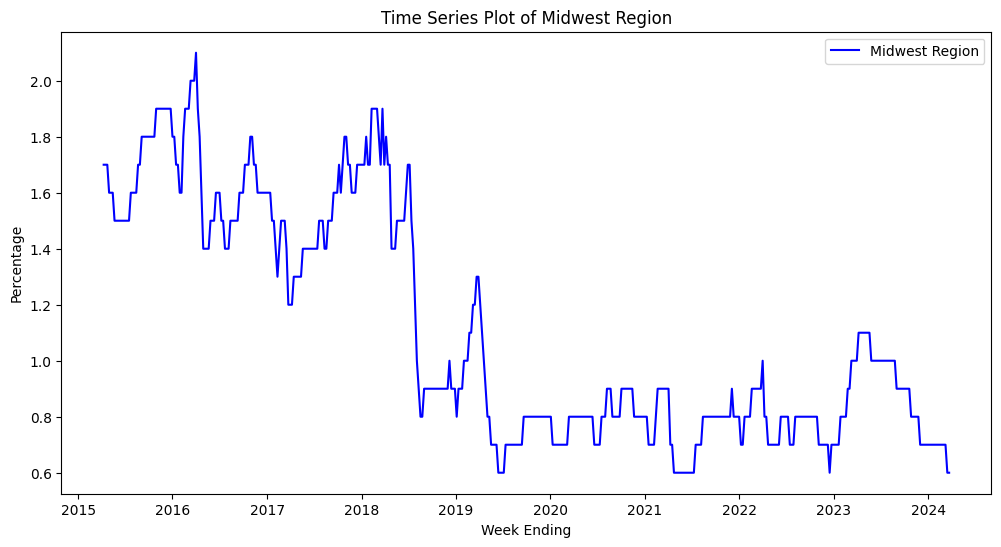

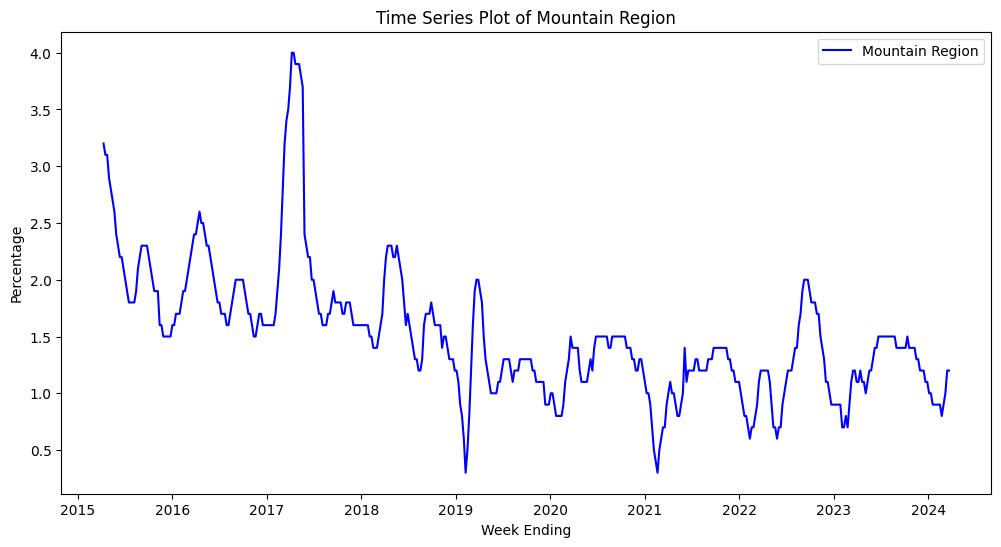

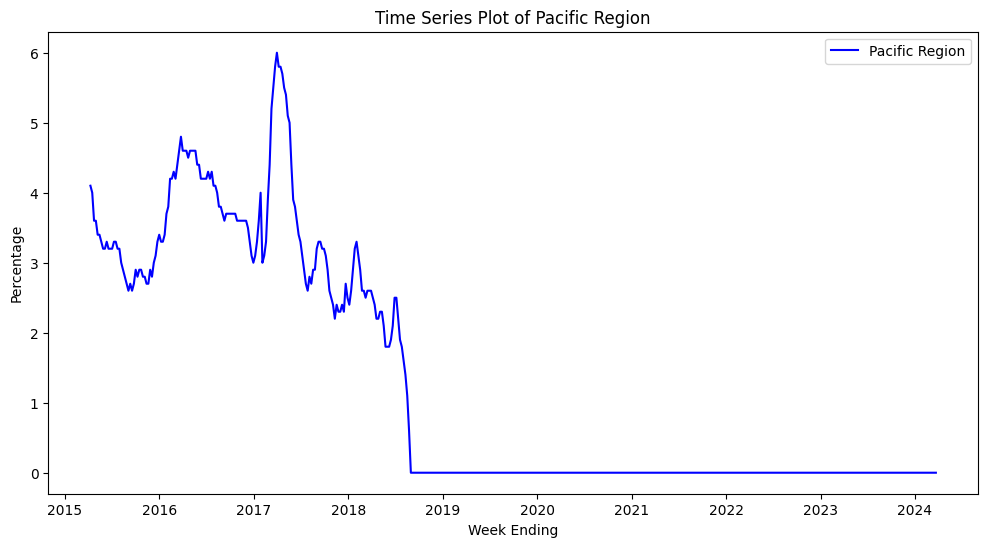

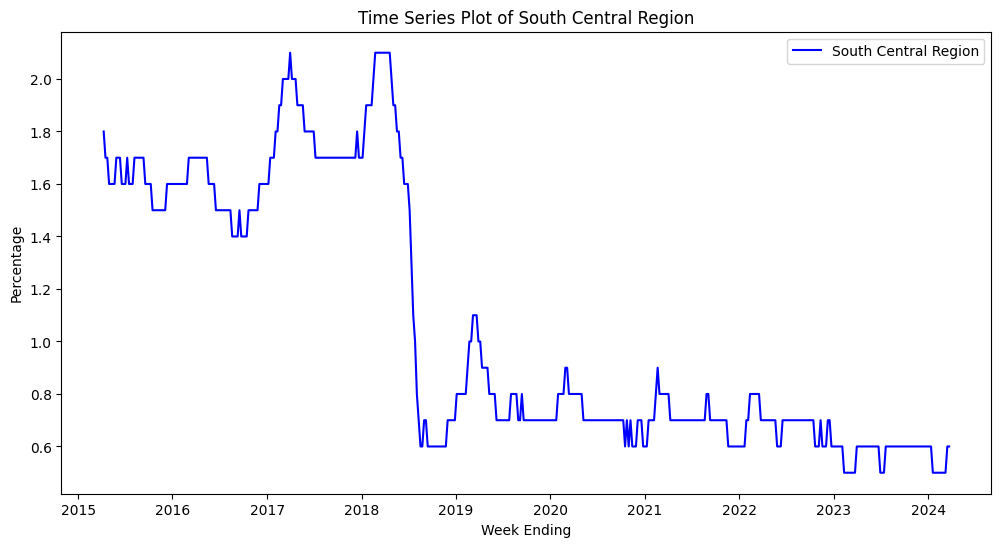

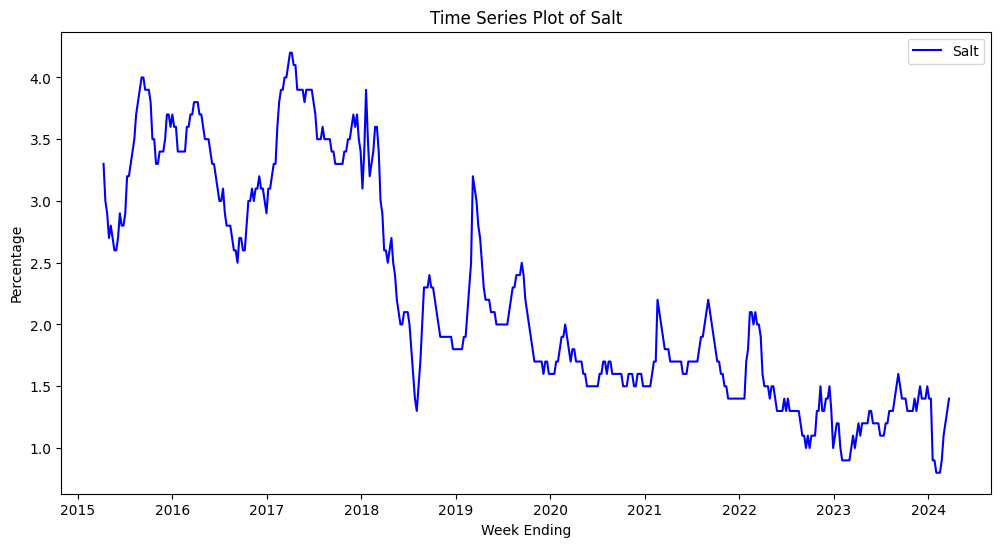

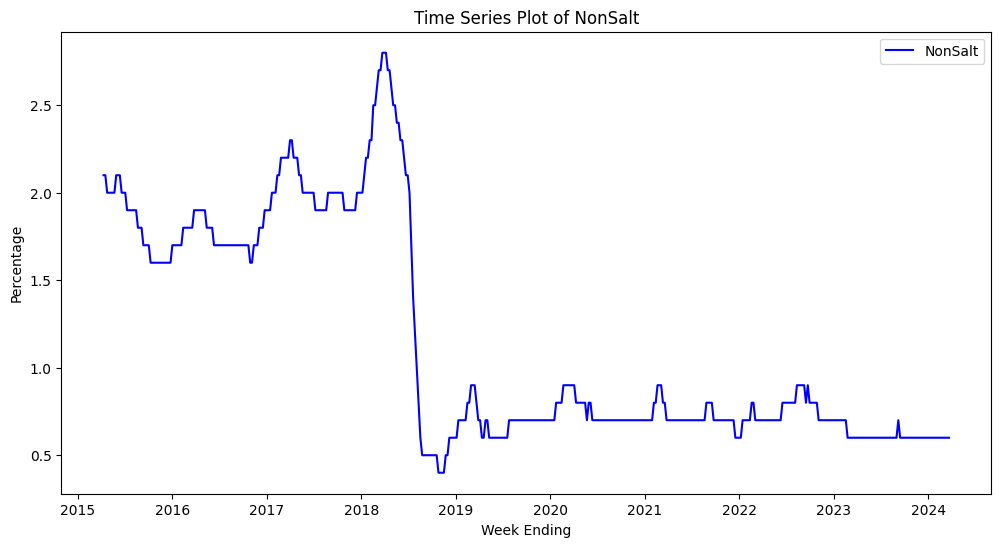

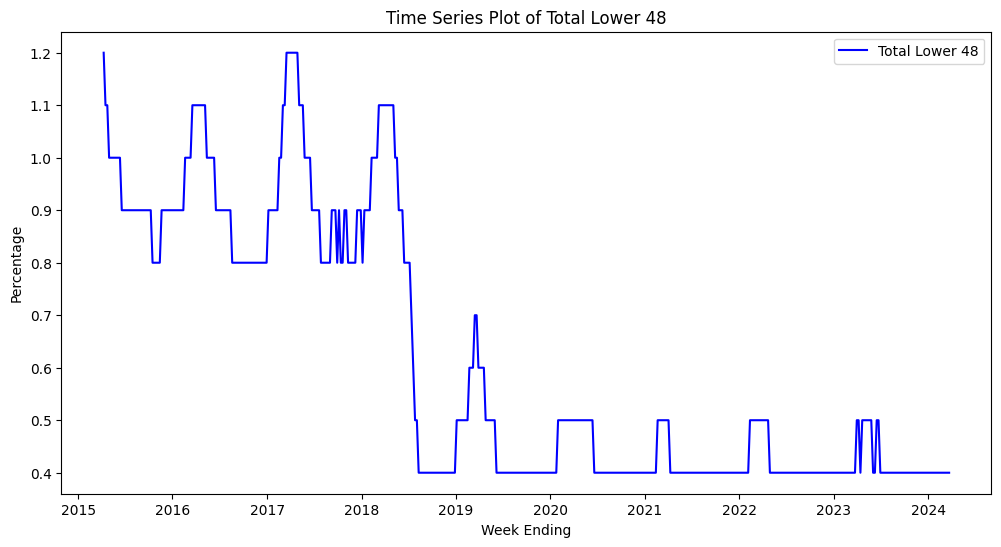

In [6]:
# Create a list of regions excluding 'Total'
csv_data['Week ending'] = pd.to_datetime(csv_data['Week ending'], format='%d/%m/%Y')
csv_data.set_index('Week ending', inplace=True)

regions = [col for col in csv_data.columns]

for region in regions:
    csv_data[region] = csv_data[region].str.rstrip('%').astype('float')

for region in regions:
    plt.figure(figsize=(12, 6))
    plt.plot(csv_data.index, csv_data[region], label=region, color='blue')
    plt.title(f'Time Series Plot of {region}')
    plt.xlabel('Week Ending')
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()


1. **East Region**
- *Trends*: There seems to be no clear long-term upward or downward trend; the data points oscillate around a particular level.<br>
*Seasonality*: There could be seasonality involved, suggested by the periodic peaks which appear to be at regular intervals.<br>
*Cyclical patterns*: Not clearly discernible due to the noise in the data.<br>
*Irregular movements*: Spikes and troughs are prominent, suggesting irregular movements that could be due to external factors or anomalies in data collection.<br>
2. **Midwest Region**
- *Trends*: There is a noticeable downward trend, particularly after 2020.<br>
*Seasonality*: Less apparent than in the East Region, although some regularity in the fluctuations can be observed.<br>
*Cyclical patterns*: The plot does not show clear cycles that span multiple years.<br>
*Irregular movements*: Some sharp declines and rises suggest irregular or sudden changes impacting the data.<br>
3. **Mountain Region**
- *Trends*: No clear long-term trend, but there is a sharp peak in 2017.<br>
*Seasonality*: The plot shows some regular fluctuations that might indicate a seasonal pattern.<br>
*Cyclical patterns*: The data does not present clear cycles.<br>
*Irregular movements*: The peak in 2017 and the subsequent drops are irregular, indicating an event or change around that time.<br>
4. **Pacific Region**
- *Trends*: A clear downward trend, especially after 2019.<br>
*Seasonality*: Not much seasonal variation; the trend dominates the plot.<br>
*Cyclical patterns*: No clear cycles are evident.<br>
*Irregular movements*: The drop after 2019 is particularly steep, which could indicate a significant event or shift in the underlying variable.<br>
5. **South Central Region**
- *Trends*: Like the Pacific Region, there is a steep decline around 2019.<br>
*Seasonality*: There are some ups and downs, but the overall trend masks any seasonal effect.<br>
*Cyclical patterns*: No clear cyclical behavior is visible.<br>
*Irregular movements*: The plot has a dramatic shift in 2019, which is irregular and noteworthy.<br>
6. **Salt**
- *Trends*: A general decline is observable, with some recovery in later years.<br>
*Seasonality*: The plot shows rises and falls that may suggest a seasonal pattern.<br>
*Cyclical patterns*: The plot does not clearly show long-term cycles.<br>
*Irregular movements*: The oscillations in the plot suggest variability, but no specific irregular events stand out.<br>
7. **NonSalt**
- *Trends*: There is a sharp decline after 2018.<br>
*Seasonality*: There's less seasonality compared to the "Salt" plot.<br>
*Cyclical patterns*: No discernible cycles are present.<br>
*Irregular movements*: The sharp decline could be due to a significant change in the underlying conditions or a data collection anomaly.<br>
8. **Total Lower 48**
- *Trends*: The plot shows a relatively stable pattern with some minor fluctuations.<br>
*Seasonality*: Not very apparent due to the aggregated nature of the data.<br>
*Cyclical patterns*: There are no obvious cycles.<br>
*Irregular movements*: There are a few notable drops, but without additional context, it's hard to interpret them.

## Stationary Check:

We will be using Augmented Dickey-Fuller test for our project and it is a statistical test used to determine whether a given time series is stationary or not.In the provided code, the ADF test is applied to the 'Total Lower 48' time series data using the adfuller function from the statsmodels.tsa.stattools module.The adfuller function returns several statistics including:

1. ADF Statistic: The ADF statistic is the primary test statistic calculated during the ADF test.
It measures the significance of the unit root in the time series data.
If the absolute value of the ADF statistic is more negative than critical values at a chosen significance level, it provides evidence against the null hypothesis of non-stationarity.
More negative values of the ADF statistic indicate stronger evidence against the null hypothesis, suggesting the time series is more likely to be stationary.
The interpretation of the ADF statistic is context-dependent and should be compared to critical values to draw conclusions about stationarity.

2. P-Value: The p-value associated with the ADF statistic represents the probability of observing a test statistic at least as extreme as the one calculated from the data under the null hypothesis of non-stationarity.
A low p-value (typically below a chosen significance level, such as 0.05) indicates strong evidence against the null hypothesis, suggesting the time series is likely to be stationary.
Conversely, a high p-value suggests insufficient evidence to reject the null hypothesis, indicating the time series is likely non-stationary.
The p-value is often used as the primary criterion for determining stationarity in practice.
3. Lags Used:This statistic represents the number of lags included in the regression when performing the ADF test.
Lags capture the temporal dependencies in the time series data and are used to account for autocorrelation.
The number of lags used is determined automatically based on criteria such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).
More lags may provide better model fit but can also increase computational complexity.

4. Number of Observations Used for ADF Regression and Critical Values Calculation:This statistic indicates the number of observations used in the regression and critical values calculation during the ADF test.
It may be less than the total number of observations in the time series data if any initial observations are dropped due to missing values or for lag purposes.
A larger number of observations generally increases the statistical power of the test.

5. Critical Values:Critical values are thresholds used to determine whether to reject the null hypothesis of non-stationarity.
They are compared to the ADF statistic to assess its significance.
Critical values are specific to different significance levels (e.g., 1%, 5%, 10%) and are chosen based on the desired level of confidence.
If the absolute value of the ADF statistic is more negative than the critical value corresponding to a chosen significance level, the null hypothesis is rejected in favor of stationarity.

In [82]:
# Loop over each column (region) in the DataFrame
for column in csv_data.columns:
    # Apply ADF test to the time series data of the current region
    adf_test_result = adfuller(csv_data[column])

    # Extract and print the p-value from the ADF test result
    p_value = adf_test_result[1]
    print(f"ADF test p-value for {column}: {p_value}")

    # Extract and print other statistics
    adf_statistic = adf_test_result[0]
    lags_used = adf_test_result[2]
    num_obs = adf_test_result[3]
    critical_values = adf_test_result[4]

    print(f"ADF Statistic: {adf_statistic}")
    print(f"Lags Used: {lags_used}")
    print(f"Number of Observations Used: {num_obs}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")

    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        print(f"The time series for {column} is likely stationary.")
    else:
        print(f"The time series for {column} is likely non-stationary.")
    print("--------------------------------------------------------------")


ADF test p-value for East Region: 0.0002894150762981412
ADF Statistic: -4.406206117429147
Lags Used: 3
Number of Observations Used: 464
Critical Values:
   1%: -3.4445220811896657
   5%: -2.8677891615873192
   10%: -2.5700985643950656
The time series for East Region is likely stationary.
--------------------------------------------------------------
ADF test p-value for Midwest Region: 0.5327216869783444
ADF Statistic: -1.5015959723580365
Lags Used: 7
Number of Observations Used: 460
Critical Values:
   1%: -3.44464601455782
   5%: -2.867843681679954
   10%: -2.570127622873346
The time series for Midwest Region is likely non-stationary.
--------------------------------------------------------------
ADF test p-value for Mountain Region: 6.85073267175575e-05
ADF Statistic: -4.747346755350348
Lags Used: 2
Number of Observations Used: 465
Critical Values:
   1%: -3.4444914328761977
   5%: -2.8677756786103683
   10%: -2.570091378194011
The time series for Mountain Region is likely stationar

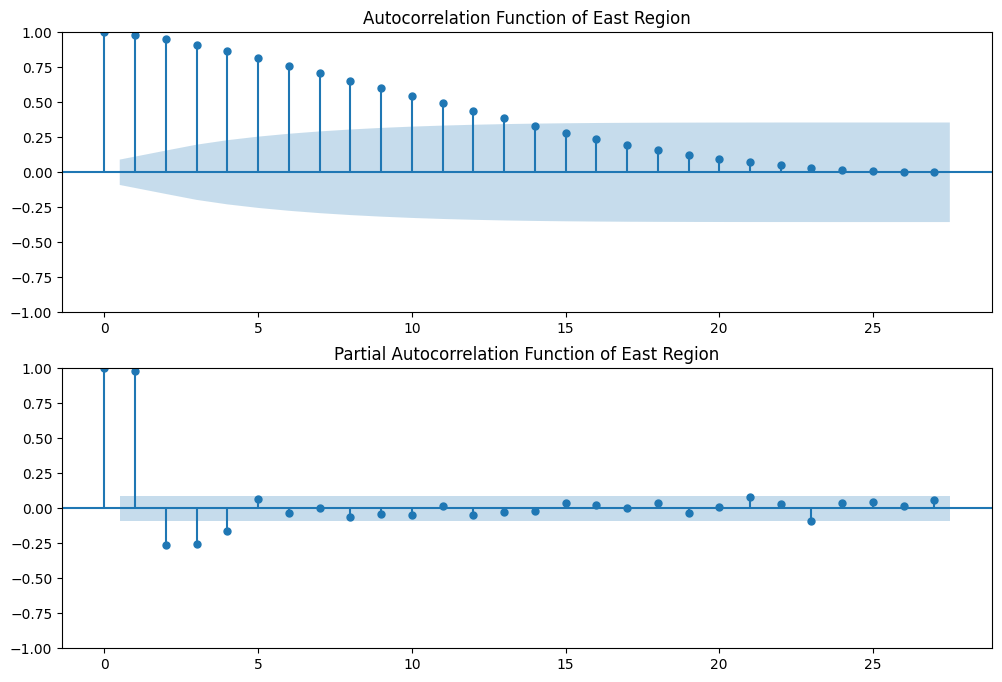

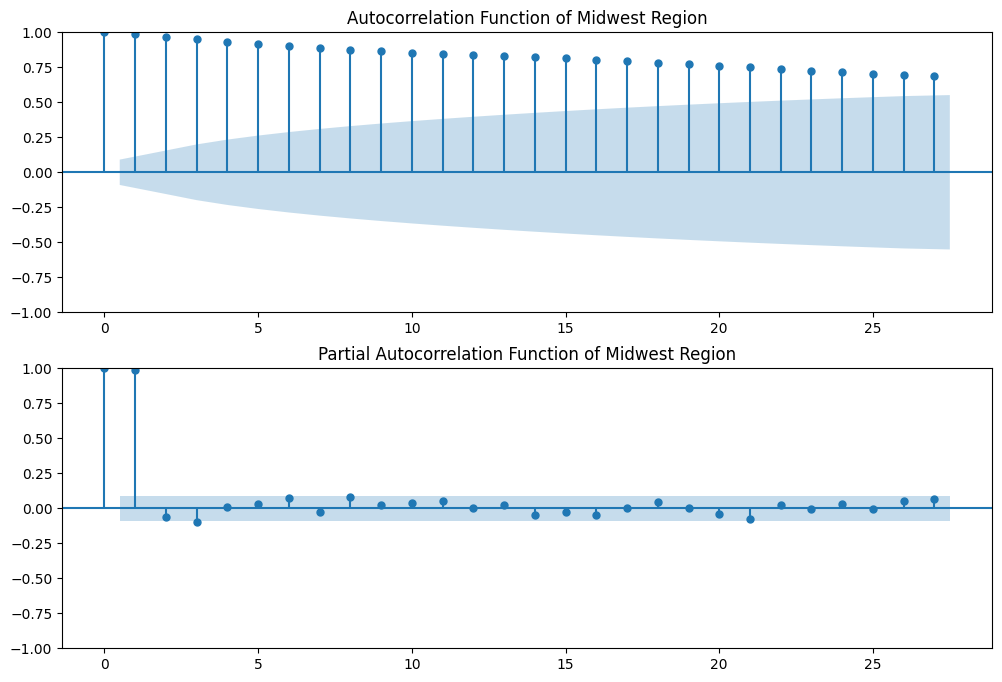

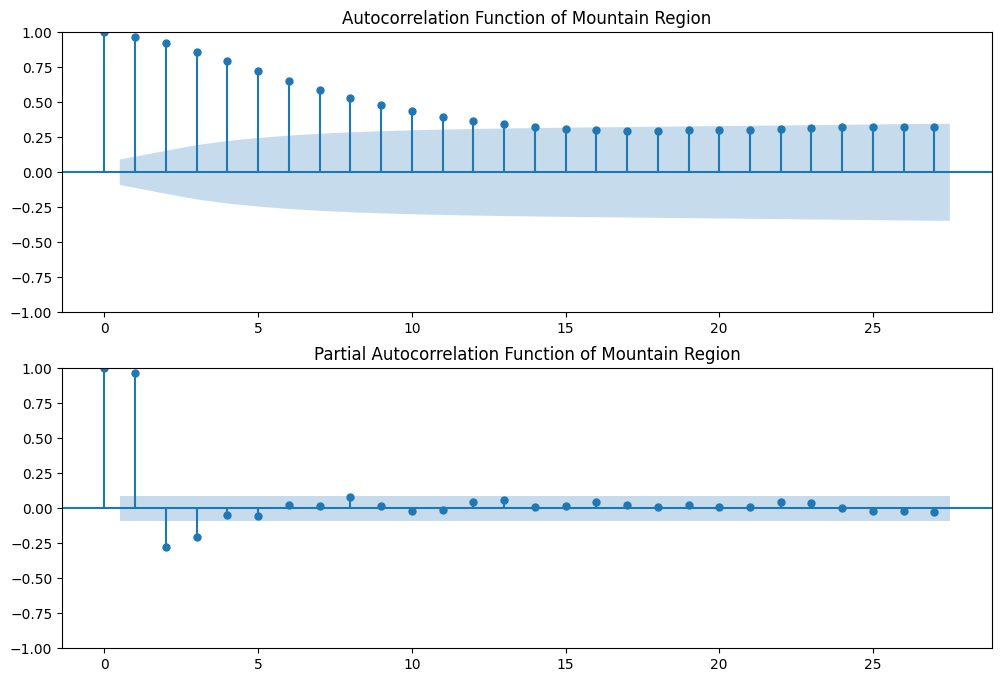

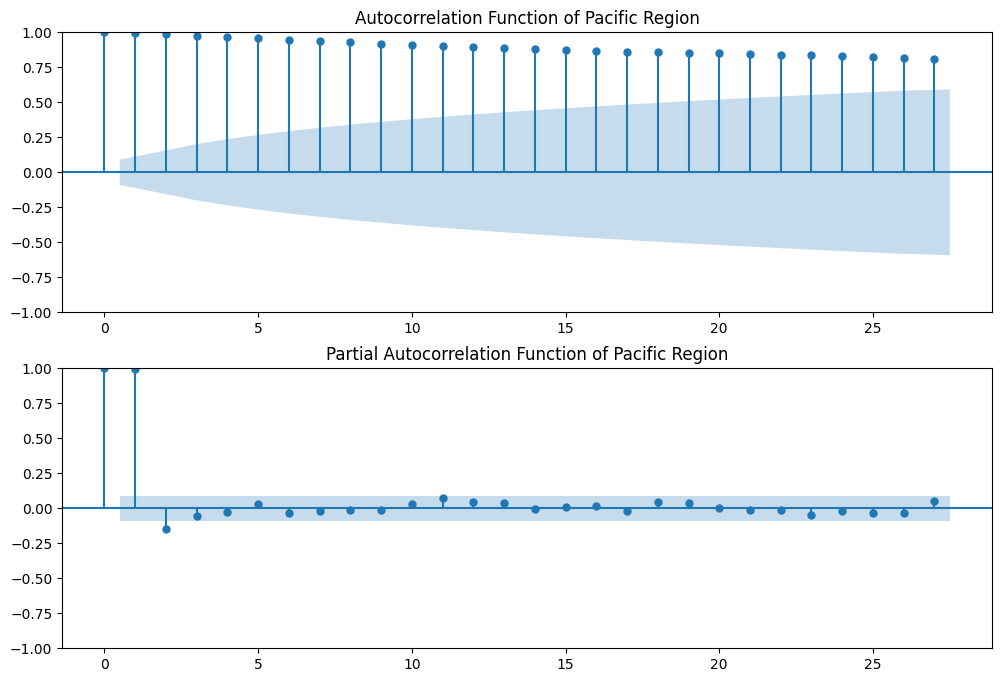

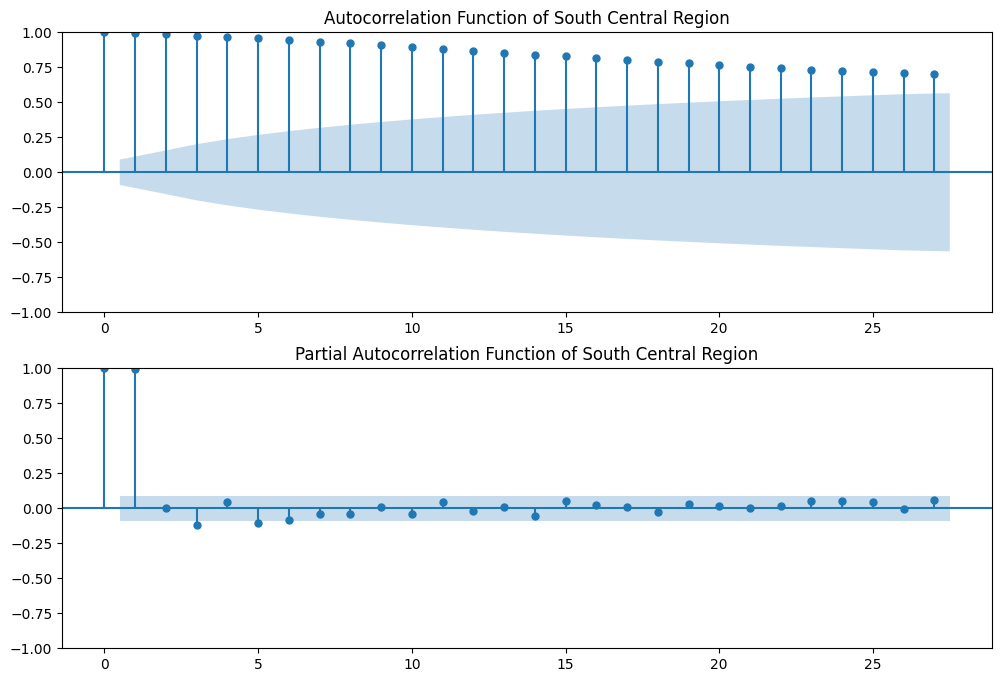

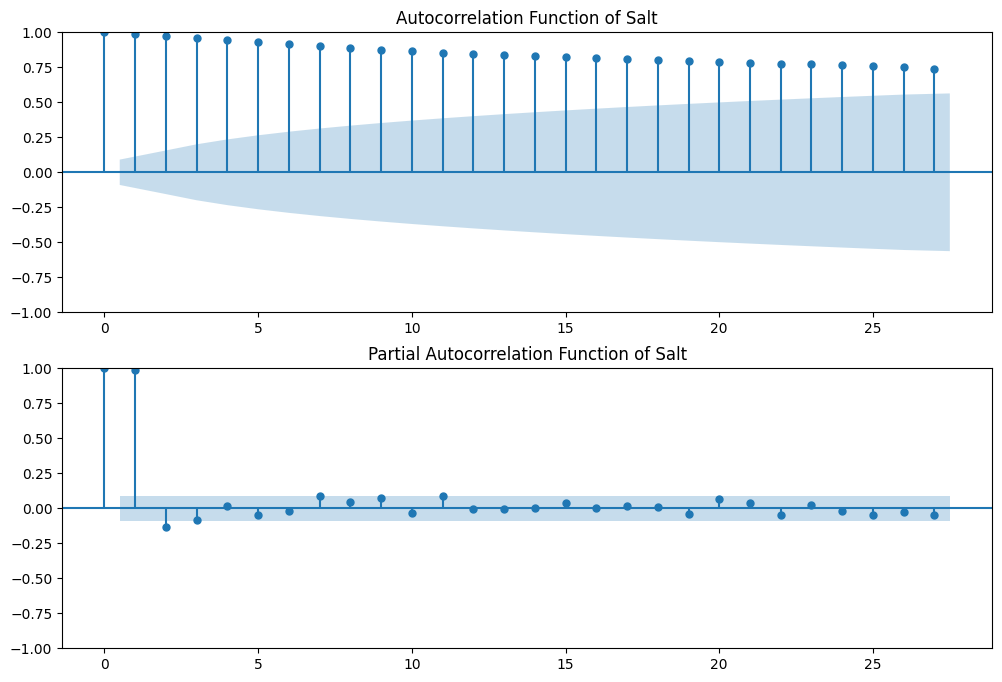

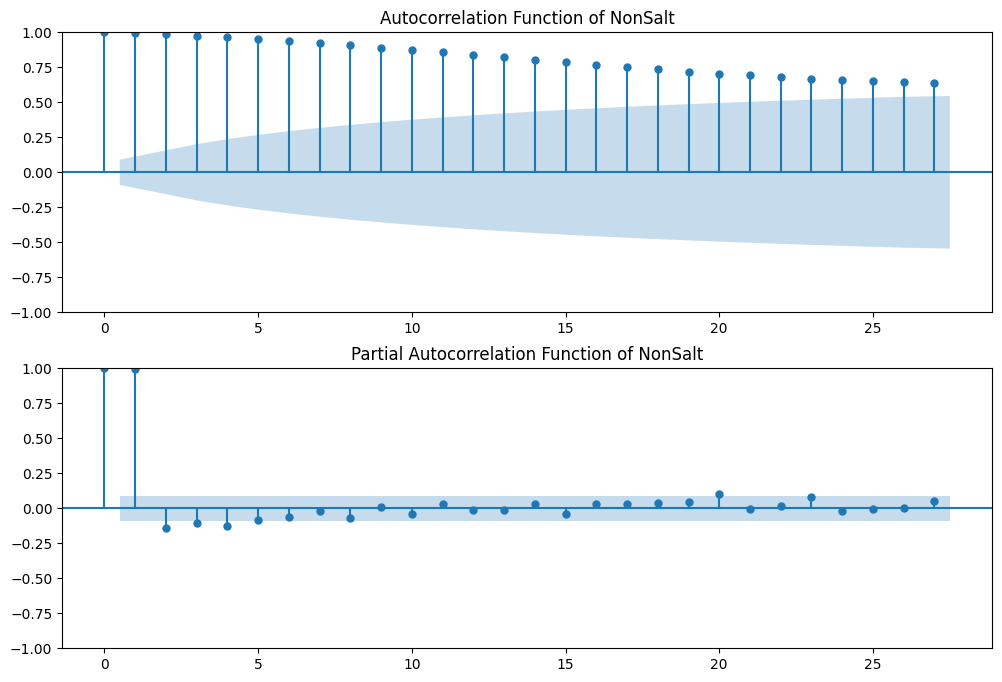

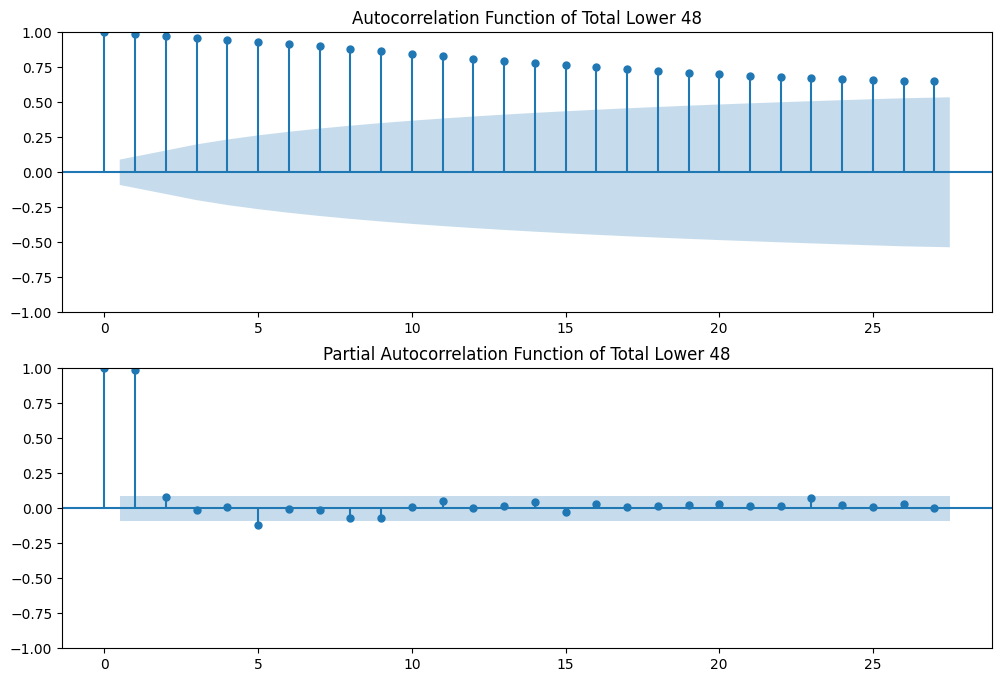

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a list of regions excluding 'Total'
regions = [col for col in csv_data.columns]

# Plot time series for each region
for region in regions:

    # Plot ACF and PACF for each region
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(csv_data[region], ax=ax1, title=f'Autocorrelation Function of {region}')
    plot_pacf(csv_data[region], ax=ax2, title=f'Partial Autocorrelation Function of {region}', method='ywm')
    plt.show()


### Autocorrelation Function (ACF)
- Significance: The blue shaded area represents the significance boundaries. If the spikes in the ACF extend beyond this area, it suggests that the correlations for those lag values are statistically significant.
- Decay: The way the ACF decays can tell us about the type of model that might fit the data. A slow decay indicates an autoregressive component, while a sharp cut-off suggests a moving average component.
- Seasonality: Regular spikes at fixed intervals might suggest a seasonal pattern.
### Partial Autocorrelation Function (PACF)
- Significance: Similar to the ACF, the significance in the PACF is determined by whether the spikes extend beyond the blue shaded area.
- Lag: Significant spikes at specific lags can indicate the order of the autoregressive term in an ARIMA model.

### Region-Specific Observations
1. East Region:
- The ACF shows significant correlation at lag 1, then a gradual decrease in correlation as the lags increase, suggesting a potential AR(1) model could be suitable.
- The PACF has a significant spike at lag 1 and then cuts off, reinforcing the idea that an AR(1) model might be appropriate.
2. Midwest Region:

- The ACF again shows a gradual decrease in correlation with a significant initial lag, which is indicative of an AR process.
- The PACF for the Midwest Region, like the East Region, shows a significant correlation at lag 1 and then cuts off, supporting the AR(1) model.

3. Mountain Region:
- The ACF plot for the Mountain Region shows that the autocorrelations start off strong and positive at lag 0 (as they always will, since the series is perfectly correlated with itself), and they gradually decrease as the lags increase.
There are no significant autocorrelations beyond the immediate first few lags, suggesting that there is minimal, if any, seasonal effect.
The slowly diminishing autocorrelations imply that past values have some influence on future values, which is indicative of an autoregressive (AR) process.
- The PACF plot shows a significant spike at lag 1, and then the partial autocorrelations fall within the confidence interval (shaded area) for all other lags.
This pattern where the PACF cuts off after the first lag is characteristic of an AR(1) process.

4. Pacific Region:
- Similar to the Mountain Region, the ACF for the Pacific Region shows strong initial autocorrelation that gradually decreases over subsequent lags.
The autocorrelations remain positive and above the significance level for many lags, suggesting a more persistent autoregressive effect compared to the Mountain Region.
- The PACF plot, much like the Mountain Region's, has a significant spike at lag 1 and insignificant correlations at all other lags.
This again is indicative of an AR(1) process, which implies that an AR model with one lag could be a good fit for this region's time series data.

5. South Central Region:
- The ACF plot exhibits strong autocorrelations at the beginning, which stay positive and above the significance level for a longer stretch of lags than what was seen in the Mountain and Pacific regions.
This might suggest a longer-lasting effect of past values on future values or a more complex AR process than a simple AR(1).
- As with the other regions, there's a significant spike at lag 1 in the PACF plot. After the first lag, the PACF falls within the confidence interval.
This supports an AR(1) model; however, considering the stronger ACF values, further investigation might be needed to confirm this model is sufficient.

6. Salt Region
- The ACF starts at 1 at lag 0 (as any time series would be perfectly correlated with itself at lag 0) and displays a gradual decline, which does not cut off sharply.
This indicates that there is a lingering autocorrelation from past values to current values, suggesting an autoregressive (AR) component could be present in the data.

- The PACF shows a significant spike at lag 1, with all subsequent lags falling within the confidence bounds.
This is indicative of an AR(1) process, as the influence of past values beyond the first lag is removed (partialled out), showing no significant direct effect on future values.
7. NonSalt

- Similar to the "Salt" time series, the "NonSalt" ACF plot shows a gradual decrease in correlation values as the lags increase.
The autocorrelations remain positive and relatively high even for higher lags, suggesting that the data may follow a similar AR process.
- The PACF for "NonSalt" also reveals a significant spike at lag 1 but not as pronounced as for "Salt."
This still suggests an AR(1) process, though the actual data might have a weaker autoregressive nature or might be influenced by additional factors not captured by this simple model.
8. Total Lower 48
- The ACF for the "Total Lower 48" displays autocorrelation that declines slowly, which remains within the confidence bounds fairly quickly.
This pattern suggests that the time series might have some level of autoregressive behavior, but less so than the individual "Salt" or "NonSalt" series.
- The PACF shows a significant value at lag 1, with a sharp drop off to non-significant values for subsequent lags.
This is again characteristic of an AR(1) process. Given this is for the "Total Lower 48," it might be indicative of a more generalized trend across the dataset rather than region-specific.

In [8]:
# Import libraries
import pandas as pd

# Define a function to make a time series stationary using differencing
def make_stationary(series):
    # Calculate the difference between consecutive observations
    diff = series.diff().dropna()  # Drop the first NaN value created by differencing

    return diff

# Loop over each non-stationary time series and make them stationary using differencing
non_stationary_columns = ['Midwest Region', 'Pacific Region', 'South Central Region', 'Salt', 'NonSalt', 'Total Lower 48']
for column in non_stationary_columns:
    # Apply differencing to make the series stationary
    stationary_series = make_stationary(csv_data[column])

    # Replace the non-stationary series in csv_data with the stationary one
    csv_data[column] = stationary_series

# Now, the non-stationary series have been converted into stationary ones


In [9]:
# Replace infinite values with NaN
csv_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
csv_data.dropna(axis=0, inplace=True)

# Now, you can rerun the ADF test code
# Loop over each column (region) in the DataFrame
for column in csv_data.columns:
    # Apply ADF test to the time series data of the current region
    adf_test_result = adfuller(csv_data[column])

    # Extract and print the p-value from the ADF test result
    p_value = adf_test_result[1]
    print(f"ADF test p-value for {column}: {p_value}")

    # Extract and print other statistics
    adf_statistic = adf_test_result[0]
    lags_used = adf_test_result[2]
    num_obs = adf_test_result[3]
    critical_values = adf_test_result[4]

    print(f"ADF Statistic: {adf_statistic}")
    print(f"Lags Used: {lags_used}")
    print(f"Number of Observations Used: {num_obs}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")

    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        print(f"The time series for {column} is likely stationary.")
    else:
        print(f"The time series for {column} is likely non-stationary.")

ADF test p-value for East Region: 0.0007539950498710062
ADF Statistic: -4.165271249206046
Lags Used: 3
Number of Observations Used: 463
Critical Values:
   1%: -3.44455286264131
   5%: -2.8678027030003483
   10%: -2.5701057817594894
The time series for East Region is likely stationary.
ADF test p-value for Midwest Region: 4.725647850491569e-15
ADF Statistic: -9.055072031158325
Lags Used: 6
Number of Observations Used: 460
Critical Values:
   1%: -3.44464601455782
   5%: -2.867843681679954
   10%: -2.570127622873346
The time series for Midwest Region is likely stationary.
ADF test p-value for Mountain Region: 0.0001501762922992637
ADF Statistic: -4.564371714950452
Lags Used: 2
Number of Observations Used: 464
Critical Values:
   1%: -3.4445220811896657
   5%: -2.8677891615873192
   10%: -2.5700985643950656
The time series for Mountain Region is likely stationary.
ADF test p-value for Pacific Region: 1.941992580645894e-11
ADF Statistic: -7.636865770488404
Lags Used: 9
Number of Observati

We can clearly see that all our non stationary time series are converted into stationary.

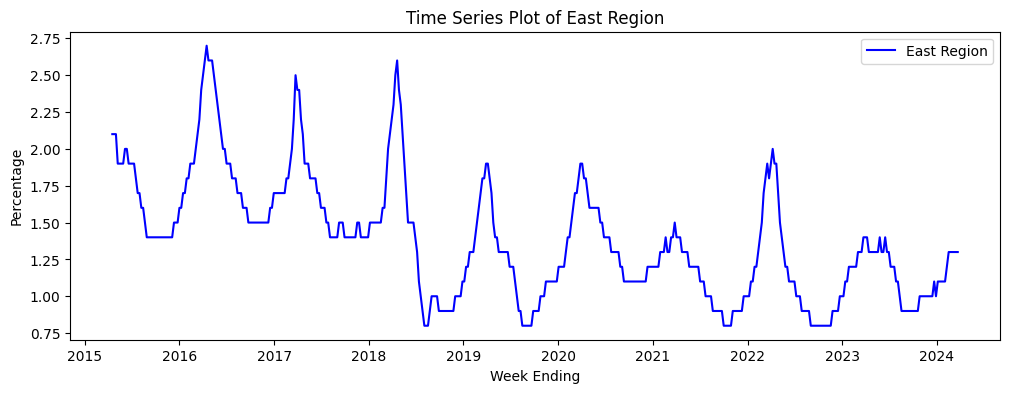

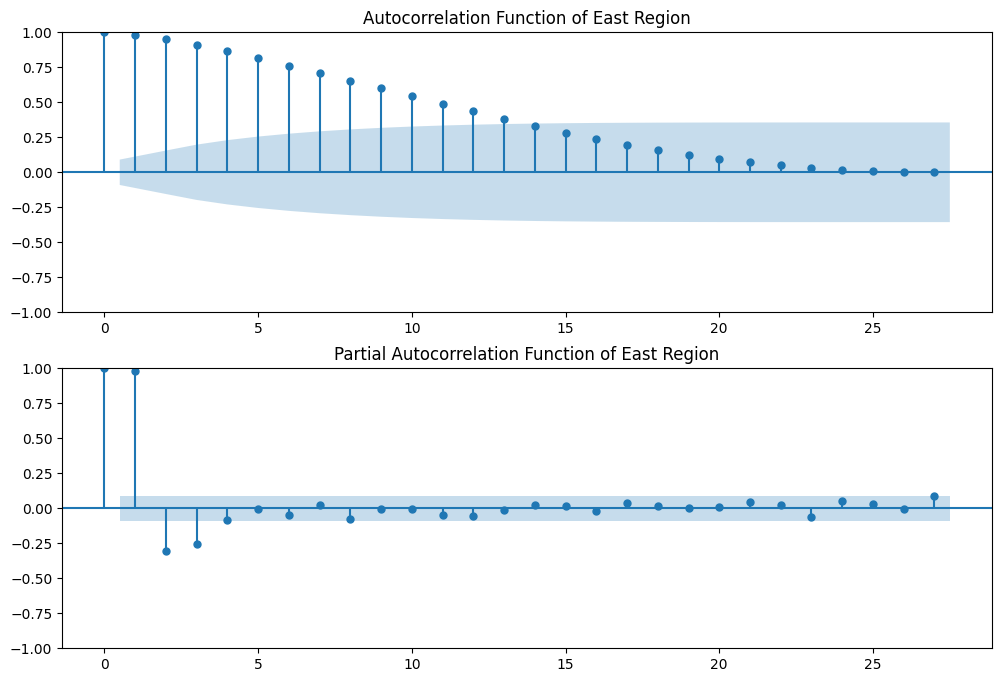

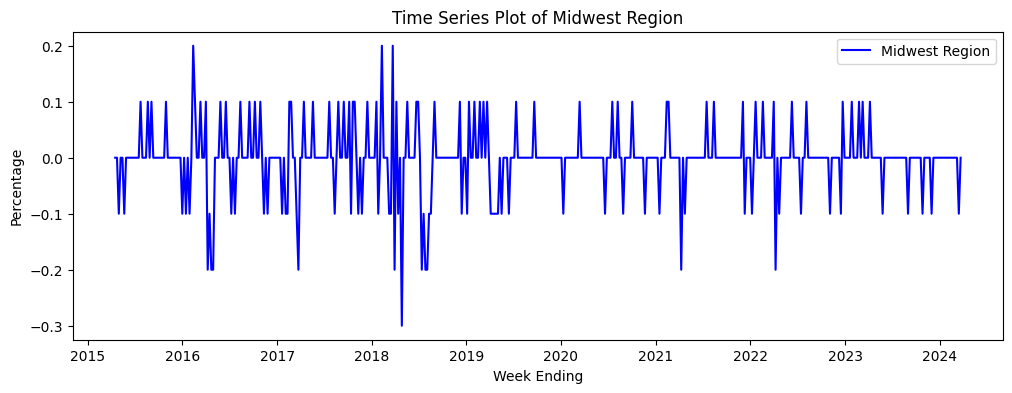

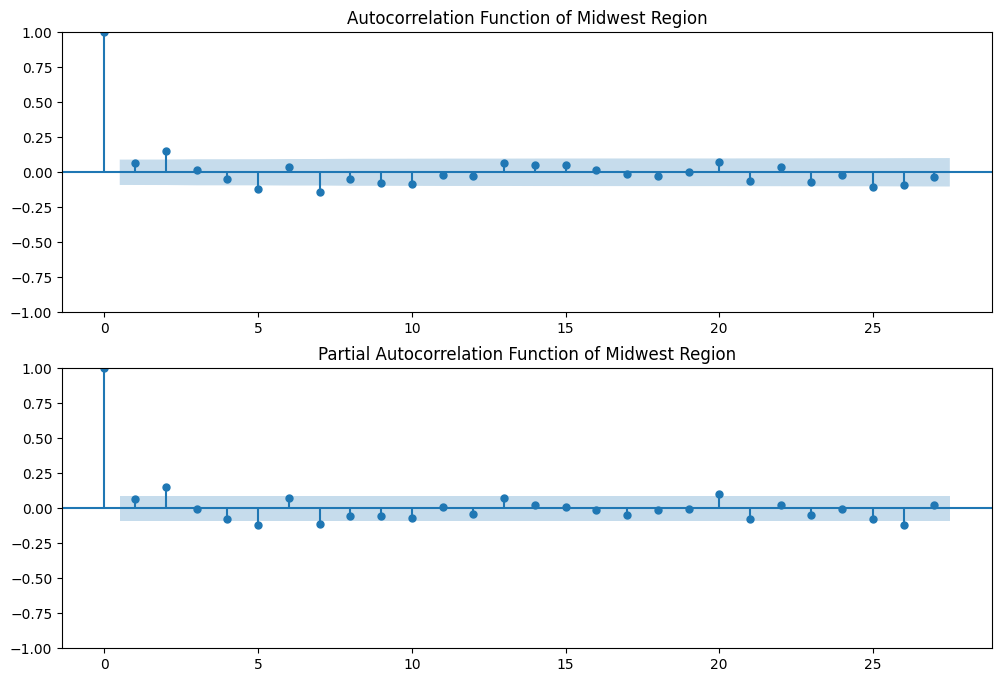

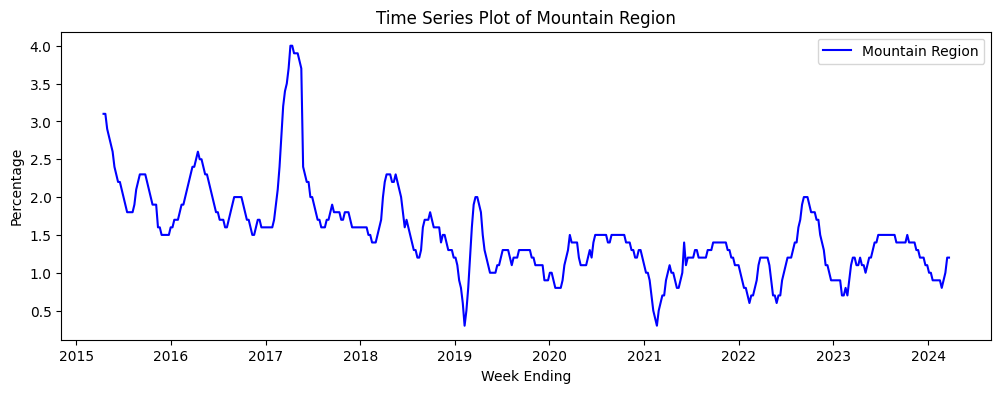

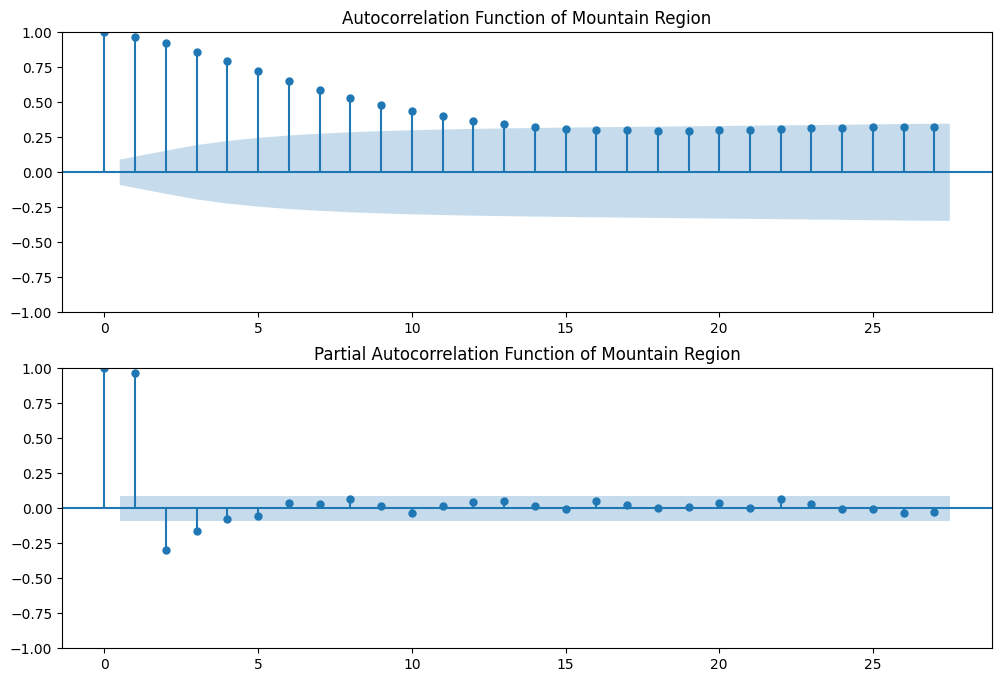

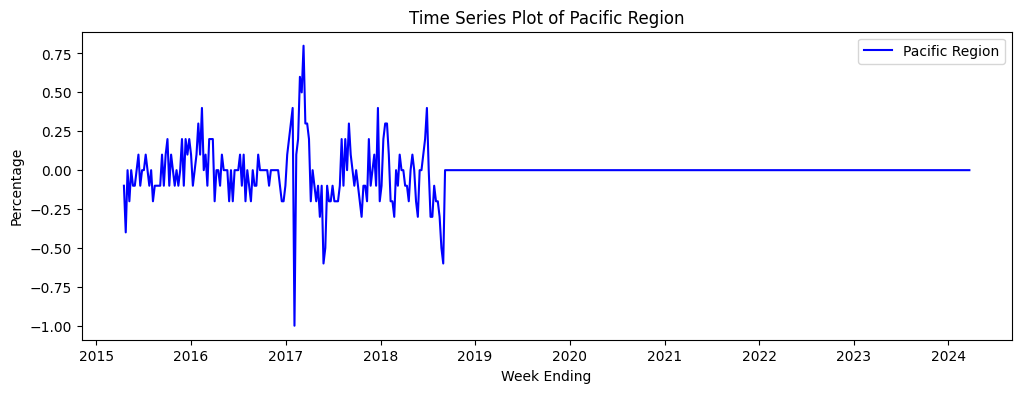

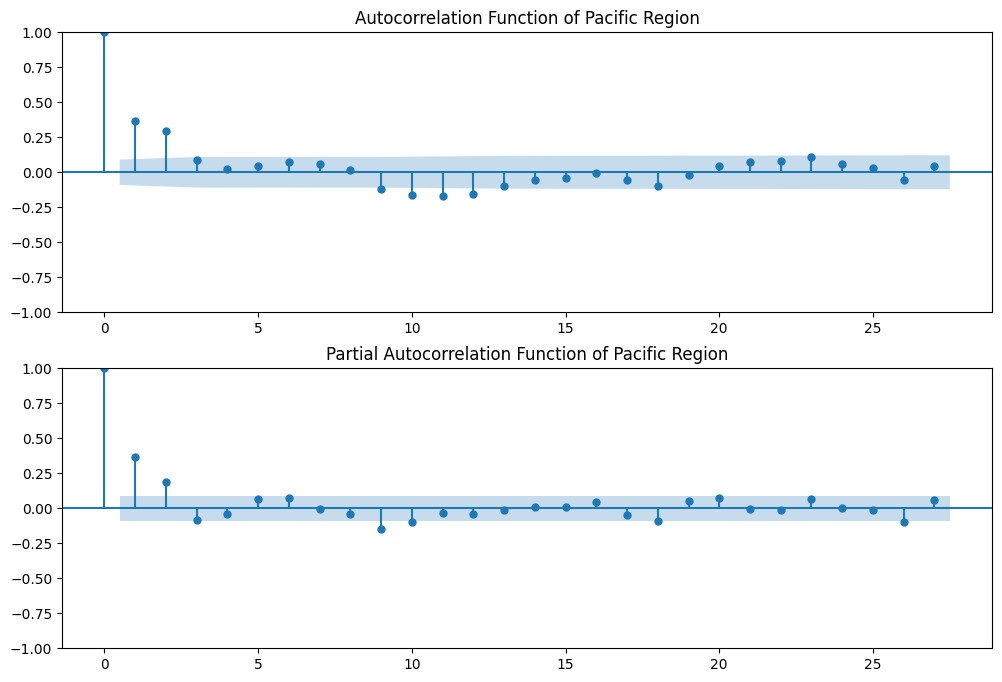

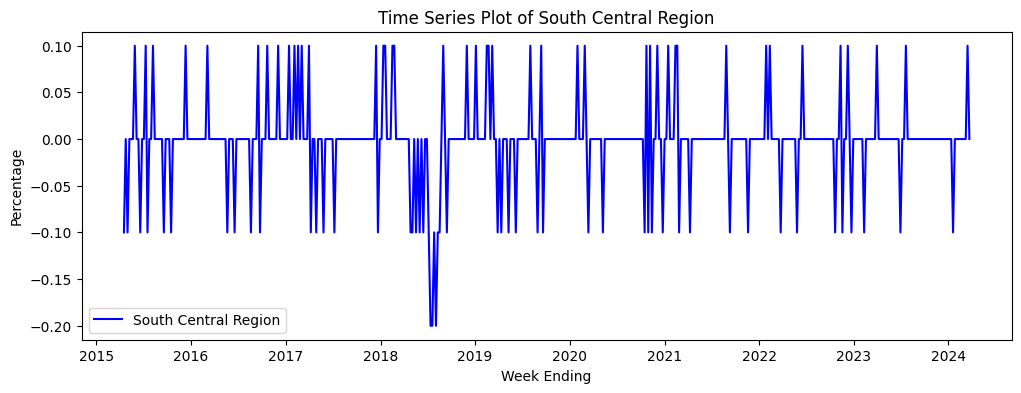

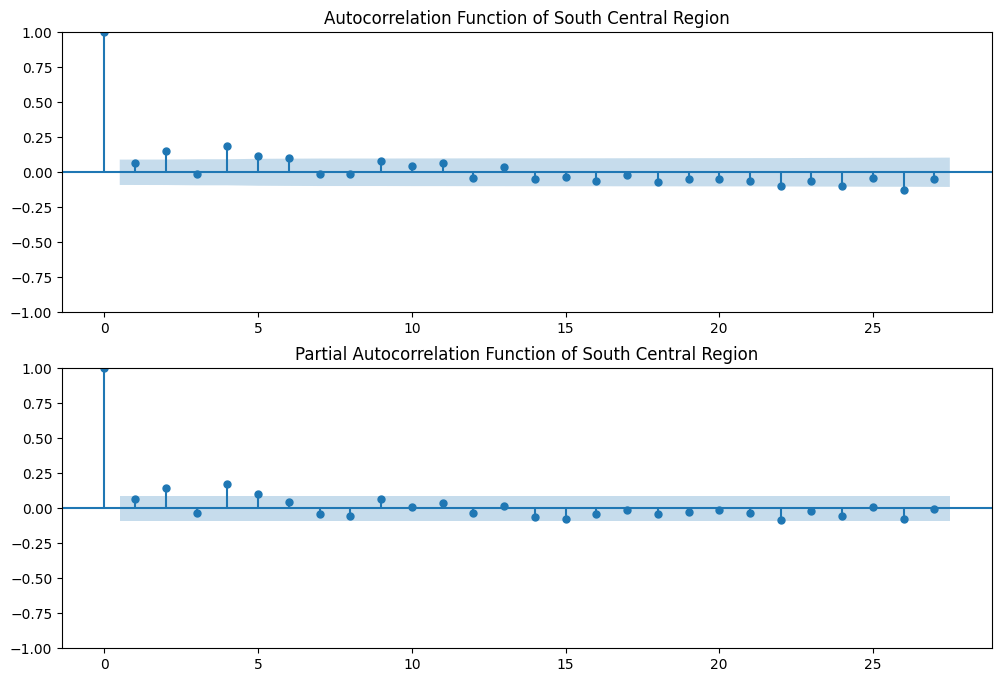

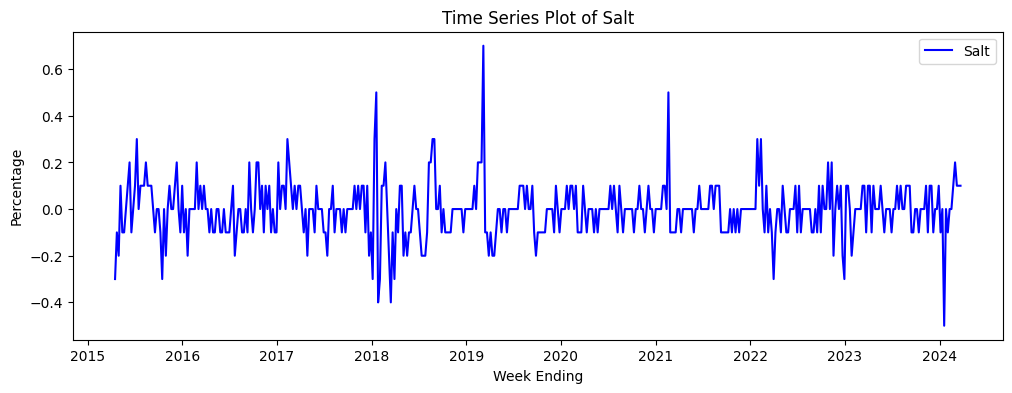

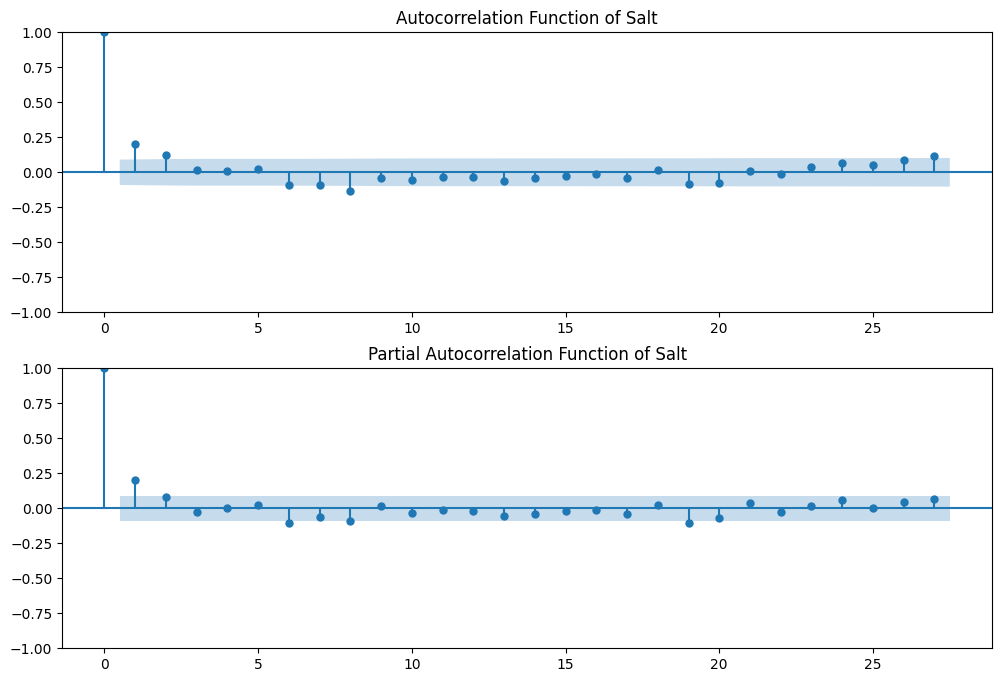

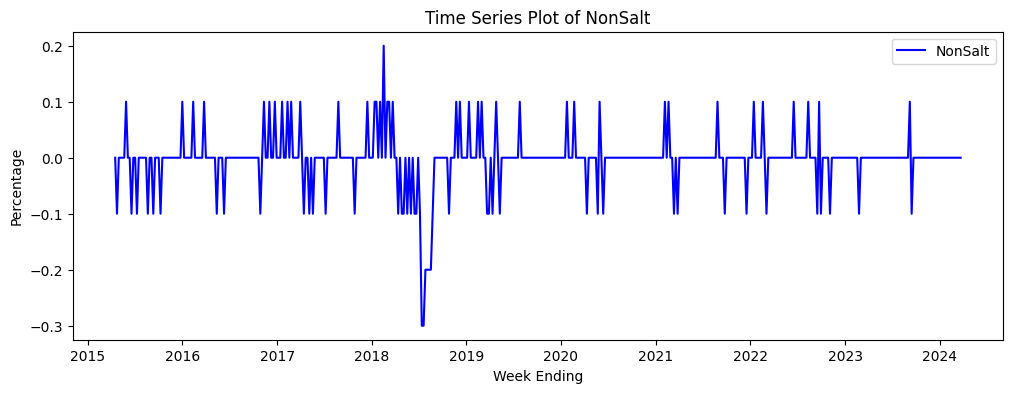

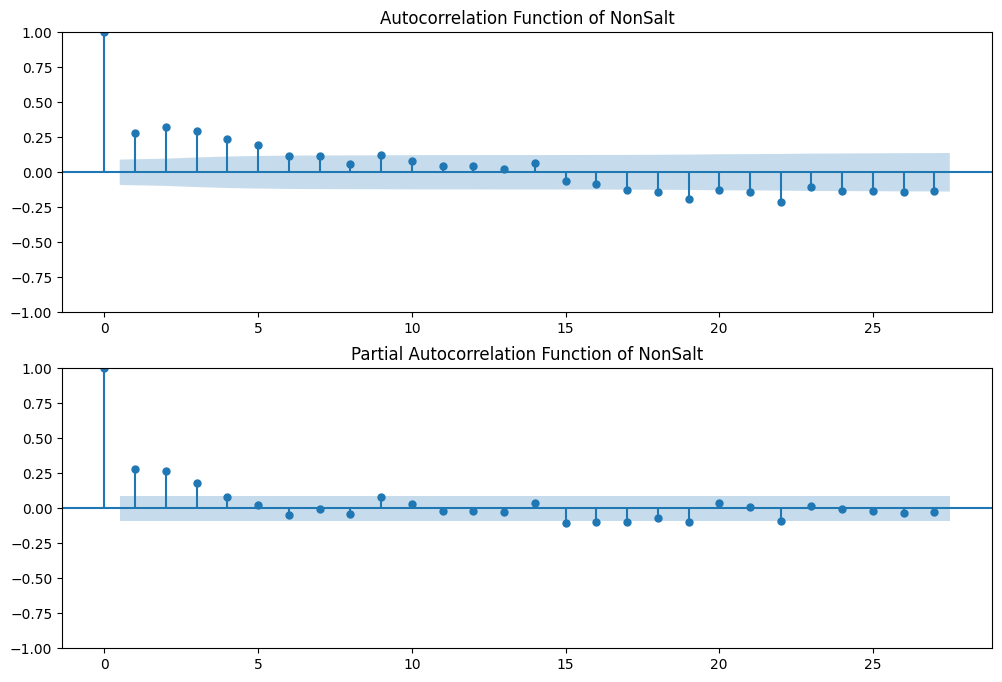

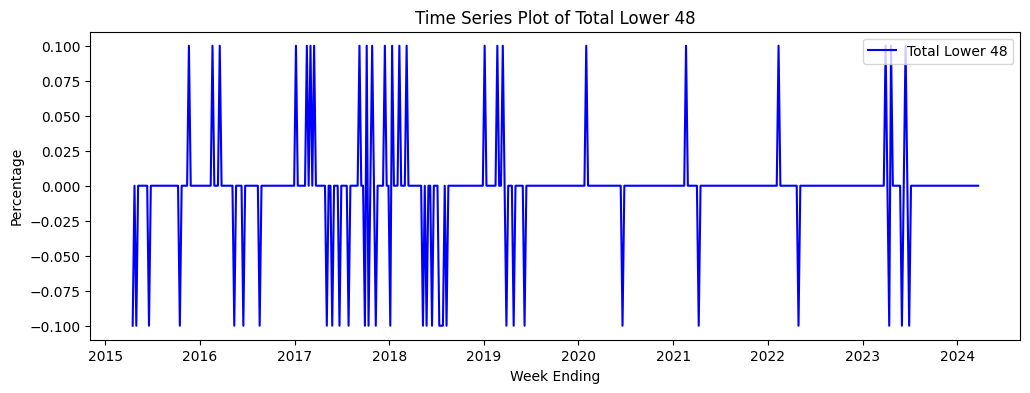

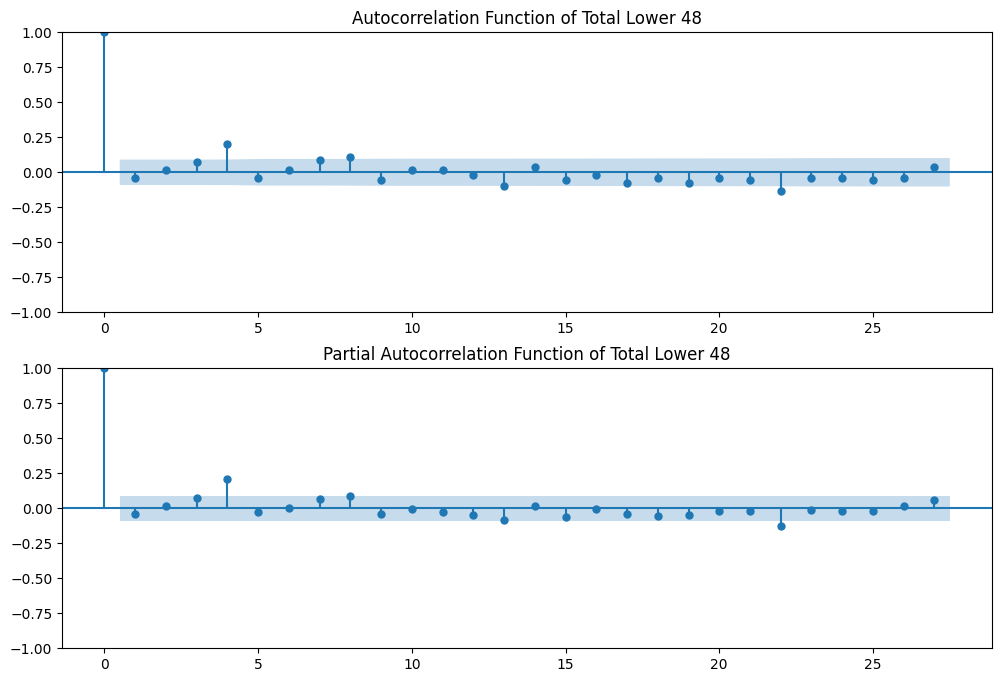

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot time series, ACF, and PACF for each region
for region in regions:
    # Plot time series
    plt.figure(figsize=(12, 4))
    plt.plot(csv_data.index, csv_data[region], label=region, color='blue')
    plt.title(f'Time Series Plot of {region}')
    plt.xlabel('Week Ending')
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()

    # Plot ACF and PACF
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(csv_data[region], ax=ax1, title=f'Autocorrelation Function of {region}')
    plot_pacf(csv_data[region], ax=ax2, title=f'Partial Autocorrelation Function of {region}', method='ywm')
    plt.show()


### **East Region Time Series and Autocorrelation Analysis**

**Time Series Plot of East Region:**
- The time series plot for the East Region shows a non-stationary pattern with distinct peaks and troughs.
- The data seems to have some form of seasonality, given the regularity of the peaks.
- There is no clear trend over the years; instead, there is considerable fluctuation within each year.<br>

**Autocorrelation Function (ACF) for East Region:**

- The ACF plot exhibits a gradual decline in autocorrelation as the lags increase.
- The significant autocorrelation at the initial lags indicates that the data points are not independent and that there is a pattern in the time series data.
- The autocorrelations remain within the significance bounds, suggesting a possible AR process at play.<br>

**Partial Autocorrelation Function (PACF) for East Region:**
- The PACF plot shows a sharp drop after lag 1, indicating a significant autocorrelation only at the first lag.
- This behavior typically suggests that an AR(1) model may be suitable for this time series.
- The partial autocorrelations beyond lag 1 are within the confidence bounds, implying that they are not significant.

### **Midwest Region Time Series and Autocorrelation Analysis**

**Time Series Plot of Midwest Region:**
- The plot displays significant variability, with no apparent seasonal or trend components.
- The fluctuations appear to be random and do not exhibit a regular pattern.
- The variability in the data points suggests that the series might be stationary, but with high volatility.<br>

**Autocorrelation Function (ACF) for Midwest Region:**
- The ACF plot for the Midwest Region shows that the autocorrelation values fall within the significance bounds almost immediately.
- This indicates a lack of strong autocorrelation in the time series data.
- The quick drop to non-significance suggests that past values have little to no influence on future values in this region's time series.

**Partial Autocorrelation Function (PACF) for Midwest Region:**
- The PACF plot similarly demonstrates that partial autocorrelations are not significant after the first lag.
- This pattern suggests a potential AR(1) model may be appropriate, but given the overall lower autocorrelation, a simpler model might suffice.
- The lack of significant peaks also suggests there may be no need for higher order AR or MA components.

### **Mountain Region Time Series and Autocorrelation Analysis**

**Time Series Plot of Mountain Region:**
- The time series for the Mountain Region shows a clear pattern of peaks and troughs, suggesting a seasonal effect.
- There are periods with sharp increases followed by gradual decreases, which may indicate a cyclical behavior in the data.<br>

**Autocorrelation Function (ACF) for Mountain Region:**
- The ACF plot shows sustained positive autocorrelation across several lags, indicating a gradual decrease in correlation as the time lag increases.
- The slow decay of the autocorrelation suggests a possible long memory process in the time series.

**Partial Autocorrelation Function (PACF) for Mountain Region:**
- The PACF plot reveals significant autocorrelation at lag 1, after which the correlations are not significant.
- The spike at lag 1 suggests an AR(1) model, similar to the East Region, could be considered for the Mountain Region.

### **Pacific Region Time Series and Autocorrelation Analysis**
**Time Series Plot of Pacific Region:**


- The time series plot for the Pacific Region shows fluctuations around what appears to be a horizontal line, which may indicate a stable mean over time.
- No clear seasonality or trend is observed in the plot.
- A significant level shift appears to occur around the year 2020, which could be indicative of an external shock or change in the data generating process.

**Autocorrelation Function (ACF) for Pacific Region:**


- The ACF plot reveals that autocorrelations are within the significance bounds, which implies a lack of strong autocorrelation.
- The correlations close to zero suggest that values are largely independent of each other.

**Partial Autocorrelation Function (PACF) for Pacific Region:**


- In the PACF plot, there is a significant spike at the first lag, after which the autocorrelations fall within the confidence interval.
- This may suggest that an AR(1) model could be suitable for this time series data.

### **South Central Region Time Series and Autocorrelation Analysis**
**Time Series Plot of South Central Region:**

- This plot displays a high level of volatility with no apparent long-term trend or seasonal pattern.
- The series appears to be centered around zero with no drift, which is indicative of a stationary process.

**Autocorrelation Function (ACF) for South Central Region:**

- The ACF plot shows that the autocorrelations are insignificant for all lags, hovering around zero within the confidence bounds.
- This indicates that the data points in the time series do not have linear relationships with their past values.

**Partial Autocorrelation Function (PACF) for South Central Region:**

- The PACF plot also indicates that partial autocorrelations are not significant, staying within the confidence bounds for all lags.
- Similar to the ACF plot, this reinforces the idea that the time series may be modeled as white noise.

### **Salt Time Series and Autocorrelation Analysis**
**Time Series Plot of Salt:**
- The time series for Salt shows consistent oscillation without a discernible pattern, indicating potential stationarity.
- There are no clear peaks or troughs that would suggest seasonality.

**Autocorrelation Function (ACF) for Salt:**

- The ACF plot presents autocorrelation values that quickly become insignificant after the first few lags.
- The rapid decrease in autocorrelation suggests a short memory process where past values do not significantly affect future values.

**Partial Autocorrelation Function (PACF) for Salt:**

- The PACF for Salt mirrors the ACF with a significant spike at lag 1, suggesting that an AR(1) model might be appropriate.
- The remaining lags show autocorrelations within the significance bounds, indicating

### **Nonsalt Time Series and Autocorrelation Analysis**
**Time Series Plot of Nonsalt:**
- Observations fluctuate around a constant mean, which may indicate a stationary series.
- There are sporadic peaks and troughs but no obvious seasonal or trending behavior.

**Autocorrelation Function (ACF) for Nonsalt:**

- The ACF plot shows that the autocorrelation values fall within the confidence interval quickly, which is typical for a stationary time series.
- There is no significant pattern in the ACF, suggesting that the data may be random white noise.

**Partial Autocorrelation Function (PACF) for Nonsalt:**

- The PACF plot reveals a significant spike at lag 1, with all subsequent lags falling within the confidence interval.
- This indicates that only the most recent past value (lag 1) has a strong linear relationship with the current value, suggesting a potential AR(1) model fit.

### **Total Below 48 Time Series and Autocorrelation Analysis**
**Time Series Plot of otal Below 48:**

- The plot shows a level series without trends or seasonal patterns, possibly suggesting stationarity.
- There is high volatility in the data, with many spikes and dips, indicating that external factors might be influencing the values.

**Autocorrelation Function (ACF) for otal Below 48:**

- Autocorrelation values quickly fall within the confidence bounds, indicating that the series does not have long-term predictive power based on past values.
- The ACF plot suggests a lack of a clear autocorrelation structure, which might imply that the time series could be modeled as a random process.


**Partial Autocorrelation Function (PACF) for otal Below 48:**

- The PACF shows a single significant spike at the first lag and no other significant values.
- Similar to NonSalt, this might suggest that an AR(1) model could be a good fit for the data as only the immediate past seems to have a significant effect.


## **Model Selection**

## **Residual Diagnosis**

## **Forecasting**